# Análisis de variables explicativas del modelo de predicción del precio de bolsa promedio diaria

En este libro de Jupyter se presenta el análisis realizado para determinar las variables explicativas del modelo de predicción de precio de bolsa promedio, requerido en el punto 10 de la asignatura Producto de Datos.

### Se importan las libreria necesarias y se carga el archivo del precio de bolsa promedio diario

In [19]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
import numpy as np
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings("ignore")

In [7]:
precios_diarios = pd.read_csv('C:/Users/juanc/github-classroom/productos-de-datos/proyecto-juccuartasmontoya/data_lake/business/precios-diarios.csv', sep = ',')

precios_diarios.head()

,fecha,precio
0,1995-07-20,1.350708
1,1995-07-21,4.924333
2,1995-07-22,1.269500
3,1995-07-23,0.953083
4,1995-07-24,4.305917


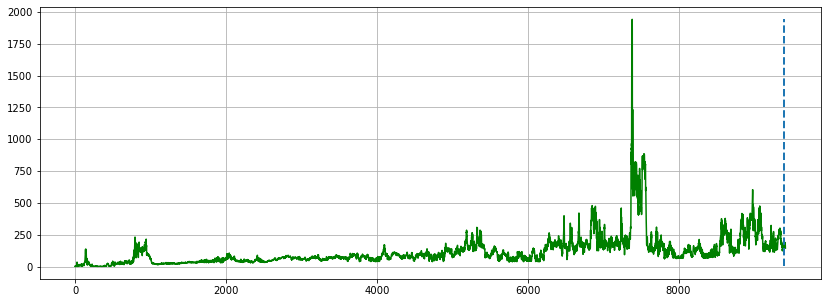

In [14]:
plt.figure(figsize=(14, 5))
plt.plot(precios_diarios['precio'], "-k", color='green')
plt.grid()

# linea vertical para dividir el entrenamiento
# del pronóstico
plt.plot([len(precios_diarios['precio']) - 24, len(precios_diarios['precio']) - 24], [min(precios_diarios['precio']), max(precios_diarios['precio'])], "--", linewidth=2);

### Se realiza el análisis exploratorio de los datos de precio de bolsa, de acuerdo a la serie presentada en la gráfica anteior.

En la serie de la gráfica anterior se observa una serie de tiempo, con algunos valores atípicos, sin embargo puede identificarse una serie creciente con algunos comportamientos estacionales.

A continuación se presenta la función de autocorrelación (ACF) simple:

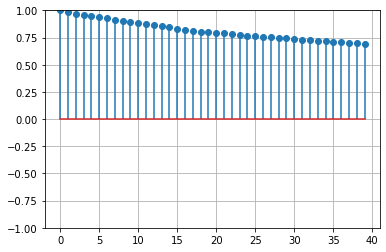

In [17]:
def acf_plot(z):
    acf_data = acf(z, fft=False)
    plt.stem(range(len(acf_data)), acf_data, use_line_collection=True)
    plt.ylim(-1, 1),
    plt.grid()


def pacf_plot(z):
    pacf_data = pacf(z)
    plt.stem(range(len(pacf_data)), pacf_data, use_line_collection=True)
    plt.ylim(-1, 1)
    plt.grid()


acf_plot(precios_diarios['precio'])

Se observa una serie decreciente a largo plazo, adempas que no se marcan unos ciclos claros en la serie.

### Ahora bien para realizar el pronóstico de la serie anterior usando el modelo de redes neuronales artificiales, Es necesario realizar la transformación de las variables.

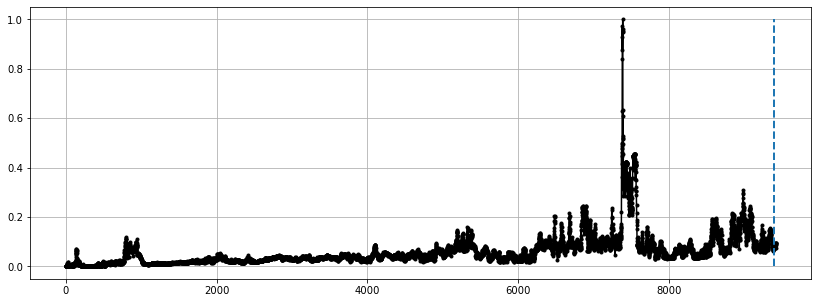

In [20]:
# crea el transformador
scaler = MinMaxScaler()

# escala la serie
data_scaled = scaler.fit_transform(np.array(precios_diarios['precio']).reshape(-1, 1))

# z es un array de listas como efecto
# del escalamiento
data_scaled = [u[0] for u in data_scaled]

plt.figure(figsize=(14, 5))
plt.plot(data_scaled, ".-k")
plt.grid()
plt.plot(
    [len(data_scaled) - 24, len(data_scaled) - 24],
    [min(data_scaled), max(data_scaled)],
    "--",
    linewidth=2,
);

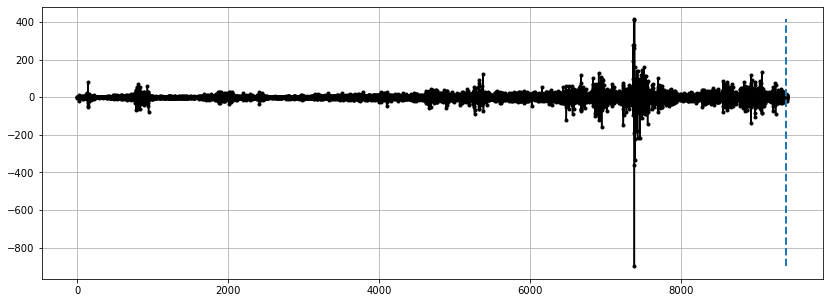

In [21]:
# Se remueve la tendencia
data_d1 = [precios_diarios['precio'][t] - precios_diarios['precio'][t - 1] for t in range(1, len(precios_diarios['precio']))]

# En la gráfica queda la componente cíclica
plt.figure(figsize=(14, 5))
plt.plot(data_d1, ".-k")
plt.grid()
plt.plot(
    [len(data_d1) - 24, len(data_d1) - 24],
    [min(data_d1), max(data_d1)],
    "--",
    linewidth=2,
);

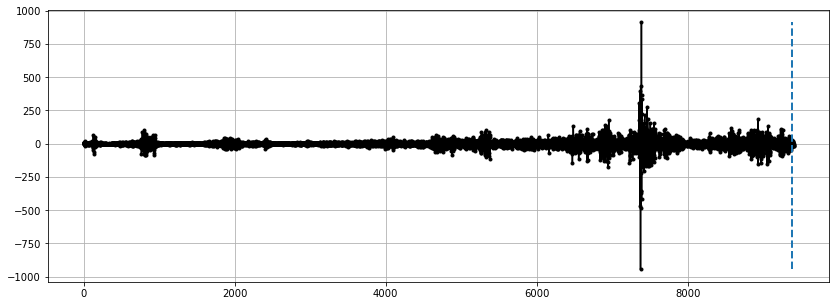

In [22]:
#
# Se remueve la componente cíclica
# restando z[t] - z[t-12]
#
data_d1d12 = [data_d1[t] - data_d1[t - 12] for t in range(12, len(data_d1))]

plt.figure(figsize=(14, 5))
plt.plot(data_d1d12, ".-k")
plt.grid()
plt.plot(
    [len(data_d1d12) - 24, len(data_d1d12) - 24],
    [min(data_d1d12), max(data_d1d12)],
    "--",
    linewidth=2,
);

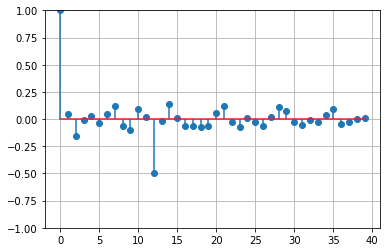

In [23]:
acf_plot(data_d1d12)

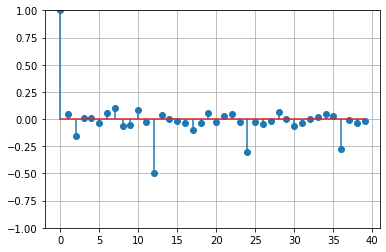

In [24]:
pacf_plot(data_d1d12)

A partir de la gráfica del PACF, se deduce que un valor apropiado para  podría ser 12.

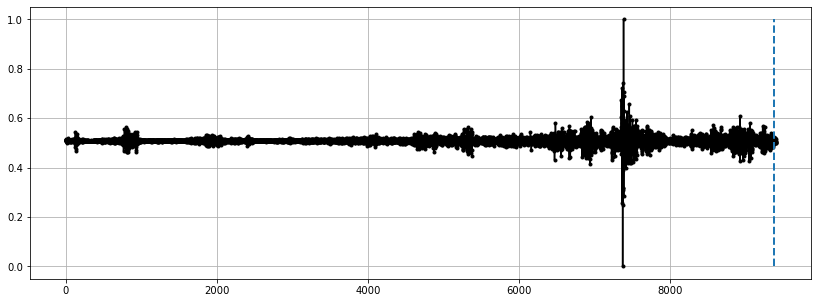

In [25]:
#
# Se escalan los valores como en el caso anaterior
#
scaler = MinMaxScaler()
data_d1d12_scaled = scaler.fit_transform(np.array(data_d1d12).reshape(-1, 1))
data_d1d12_scaled = [u[0] for u in data_d1d12_scaled]

#
# Se verifica visualmente el escalamiento
#
plt.figure(figsize=(14, 5))
plt.plot(data_d1d12_scaled, ".-k")
plt.grid()
plt.plot(
    [len(data_d1d12_scaled) - 24, len(data_d1d12_scaled) - 24],
    [min(data_d1d12_scaled), max(data_d1d12_scaled)],
    "--",
    linewidth=2,
);

In [26]:
#
# La longitud de la serie cambia
#
len(data_d1d12_scaled)

9404